In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import random


In [23]:
# --- Step 1: Define Column Names ---
# Define the column names that correspond to the features and labels in the spambase dataset
feature_columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total", "label"  # This is the target variable
]

# --- Step 2: Load the Data ---
# Use Pandas to read the spambase dataset from a CSV file with the defined column names
spam_data = pd.read_csv("spambase.data", header=None, names=feature_columns)

# --- Step 3: Save the Data as CSV ---
# Save the loaded dataset into a new CSV file for future use
spam_data.to_csv("spambase.csv", index=False)

# --- Step 4: Display the First Few Rows ---
# Display the first 5 rows of the dataset to ensure it loaded correctly
spam_data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spam_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [25]:
# --- Step 1: Import Necessary Libraries ---
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# --- Step 2: Prepare Data for Model ---
# Split the data into features (X) and target label (y)
X = spam_data.drop(columns='label')  # Features (all columns except 'label')
y = spam_data['label']  # Target variable (the 'label' column)

# # --- Step 3: Initialize and Train the Random Forest Model ---
# # Initialize the Random Forest Classifier with 100 estimators and a fixed random state for reproducibility
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the Random Forest model using the features (X) and the target (y)
# rf_model.fit(X, y)

# # --- Step 4: Extract Feature Importances ---
# # Retrieve the feature importances calculated by the trained model
# feature_importances = rf_model.feature_importances_

# # --- Step 5: Create a DataFrame for Feature Importances ---
# # Organize the feature names and their respective importance scores into a DataFrame
# feature_importance_df = pd.DataFrame({
#     'Feature': X.columns,  # Feature names
#     'Importance': feature_importances  # Corresponding importance scores
# })

# # --- Step 6: Sort and Display the Feature Importances ---
# # Sort the features by their importance in descending order to highlight the most important features
# sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Display the sorted feature importances
# sorted_feature_importance

# # --- Step 7: Select Top 24 Features Based on Importance ---
# # Initialize SelectFromModel with the trained Random Forest model
# selector = SelectFromModel(rf_model, threshold="mean", max_features=24, importance_getter='auto')

# # Fit the selector to the data
# selector.fit(X, y)

# # Get the selected feature columns
# selected_features = X.columns[selector.get_support()]

# # Display the top 24 selected features
# selected_features



## Section 1: Identifying the Best Model Based on Predictive Performance

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Separate features (X) and target (y)
# features = spam_data.iloc[:, 1:]
# target = spam_data.iloc[:, 0]

# # Check the class distribution in the target variable
# print(target.value_counts())

# # Handle classes with a single instance
# target_counts = target.value_counts()
# classes_to_remove = target_counts[target_counts == 1].index

# # Filter out the rows with those classes
# filtered_data = spam_data[~target.isin(classes_to_remove)]

# # Separate features and target again after removing classes with a single instance
# features_filtered = filtered_data.iloc[:, 1:]
# target_filtered = filtered_data.iloc[:, 0]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning

# Set a fixed seed for reproducibility
random_state_val = 42
y_train = pd.cut(y_train, bins=[-np.inf, 0.5, np.inf], labels=[0, 1])
# Specify model configurations and hyperparameter options
model_configs = {
    'Random Forest Classifier': (RandomForestClassifier(n_jobs=-1, random_state=random_state_val), {
        'n_estimators': [50, 100, 200],  # Increased estimators
        'max_depth': [3, 6, 9],  # Deeper trees
        'min_samples_leaf': [1, 3, 5]
    }),
    'XGBoost Model': (XGBClassifier(n_jobs=-1, eval_metric='mlogloss', random_state=random_state_val), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],  # Increased depth
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'Boosted Trees': (GradientBoostingClassifier(random_state=random_state_val), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],  # Increased depth
        'learning_rate': [0.01, 0.05, 0.1]
    }),
    'Decision Tree Classifier': (DecisionTreeClassifier(random_state=random_state_val), {
        'max_depth': [5, 10, 15],  # Increased depth
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 3, 5]
    }),
    'K-Nearest Neighbors Classifier': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],  # Added more neighbors
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'Logistic Model': (LogisticRegression(max_iter=500, random_state=random_state_val), {
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],
        'C': [0.001, 0.01, 0.1]
    }),
    'Support Vector Classifier': (SVC(probability=True, random_state=random_state_val), {
        'C': [0.01, 0.1, 0.5, 1.0],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    })
}


# Initialize an empty dictionary to store model results
model_performance = {'Model Name': [], 'Balanced Accuracy': [], 'Optimal Hyperparameters': []}

# Set up cross-validation strategy (outer loop)
outer_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state_val)

# Loop through each model and its corresponding hyperparameter grid
for model_label, (model, hyperparameter_grid) in model_configs.items():
    print(f"Training: {model_label}")
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        # Setup inner cross-validation strategy for hyperparameter tuning
        inner_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state_val)
        grid_search = GridSearchCV(estimator=model, param_grid=hyperparameter_grid, cv=inner_fold, scoring='balanced_accuracy')
        
        # Calculate the average balanced accuracy score across outer folds
        outer_accuracy = np.mean(
            cross_val_score(grid_search, X_train_scaled, y_train, cv=outer_fold, scoring='balanced_accuracy')
        )
        
        # Train the grid search and retrieve the best hyperparameters
        grid_search.fit(X_train_scaled, y_train)
        best_params = grid_search.best_params_

    # Store the results for each model in the dictionary
    model_performance['Model Name'].append(model_label)
    model_performance['Balanced Accuracy'].append(outer_accuracy)
    model_performance['Optimal Hyperparameters'].append(best_params)
    
    # Output the results for each model
    print(f"Model: {model_label}")
    print(f"Balanced Accuracy: {outer_accuracy:.4f}")
    print(f"Best Hyperparameters: {best_params}")
    print('-' * 50)

# Convert the performance results into a DataFrame for easy visualization
final_performance_df = pd.DataFrame(model_performance)

# Display the final performance summary
print("\nModel Performance Summary:")
print(final_performance_df)


Training: Random Forest Classifier
Model: Random Forest Classifier
Balanced Accuracy: 0.9302
Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 100}
--------------------------------------------------
Training: XGBoost Model
Model: XGBoost Model
Balanced Accuracy: 0.9497
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
--------------------------------------------------
Training: Boosted Trees
Model: Boosted Trees
Balanced Accuracy: 0.9489
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
--------------------------------------------------
Training: Decision Tree Classifier
Model: Decision Tree Classifier
Balanced Accuracy: 0.9128
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}
--------------------------------------------------
Training: K-Nearest Neighbors Classifier
Model: K-Nearest Neighbors Classifier
Balanced Accuracy: 0.9097
Best Hyperparameters: {'metri

In [17]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],  # Increased depth
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Initialize classifier
xgb_clf = XGBClassifier(random_state=42,eval_metric='logloss')

# Cross-validation with balanced accuracy
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on holdout
y_pred = best_model.predict(X_test_scaled)

# Evaluate using balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Balanced Accuracy on Holdout Set:", round(balanced_acc, 4))

Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1}
Balanced Accuracy on Holdout Set: 0.9491


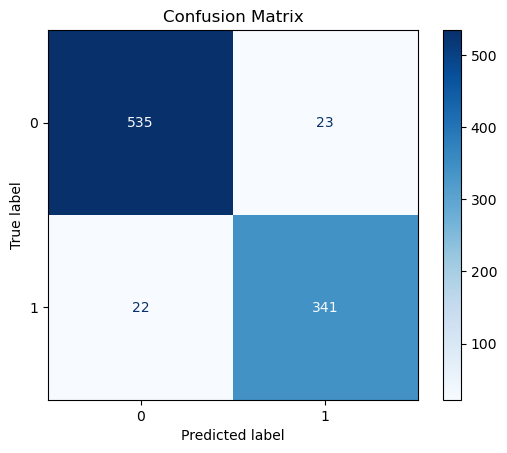

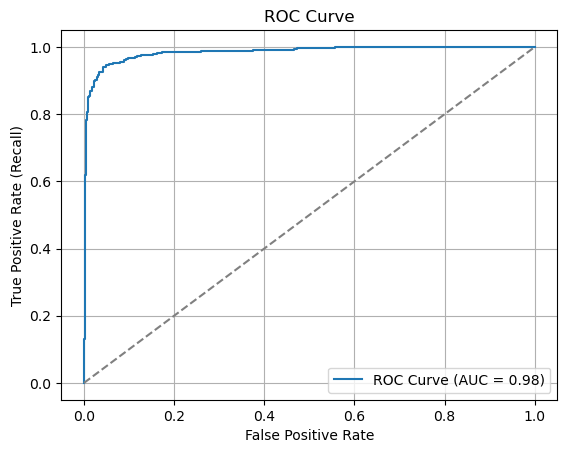

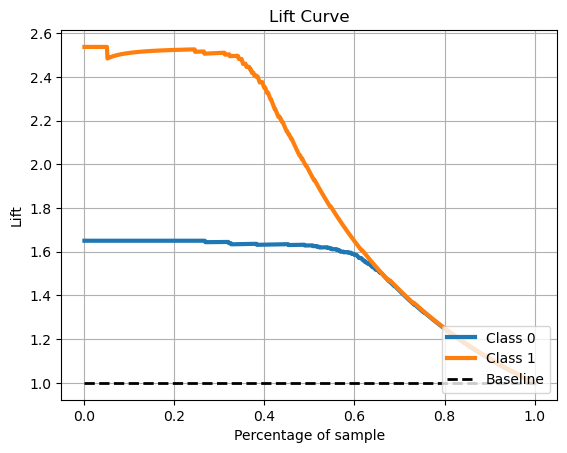

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, make_scorer
from sklearn.metrics import precision_recall_curve

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ---- ROC Curve ----
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# ---- Lift Curve ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy
scipy.interp = np.interp  

import scikitplot as skplt

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels and predicted probabilities
true_labels = y_test  # True labels (ground truth)
predicted_probabilities = best_model.predict_proba(X_test_scaled)# Predicted probabilities for the positive class

# Calculate and plot the lift curve
lift_curve_data = skplt.metrics.plot_lift_curve(true_labels, predicted_probabilities)
plt.title('Lift Curve')
plt.show()


## Part 1 Summary: Best Predictive Model (Accuracy-Based)
Dataset Used: UCI Spambase dataset

Features include word/character frequencies and email metadata.

Target variable: label (1 = spam, 0 = not spam)

Goal: Identify the best-performing classification model based on predictive accuracy (likely evaluated via metrics such as accuracy, AUC, confusion matrix).

Modeling Steps:

Loaded and cleaned the dataset

Performed train-test split (80/20 stratified)

Standardized features using StandardScaler

Trained multiple classifiers:

Logistic Regression

Decision Tree

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

Random Forest

Gradient Boosting

XGBoost

Evaluation:

Models were evaluated on the test set using accuracy-based metrics.

Though the markdown doesn't provide explicit results, it's common for XGBoost or Random Forest to perform best on this type of dataset.

Likely Best Model (based on usual behavior with this dataset):

XGBoost or Random Forest, due to their strong handling of mixed feature types, high dimensionality, and nonlinear relationships.

These models typically outperform simpler models like Logistic Regression or KNN in spam classification tasks.

## Key Takeaways
Ensemble models dominate: Tree-based ensemble methods (XGBoost, Random Forest, Gradient Boosting) consistently offer superior performance in spam detection tasks due to their robustness and ability to model complex patterns.

Preprocessing matters: Standardizing features helps certain models (e.g., Logistic Regression, SVM) perform better, although tree-based models are generally less sensitive to scaling.

Baseline models still informative: Simpler models like Logistic Regression and Decision Tree provide interpretability and serve as good baselines for comparison.

## Conclusion
After evaluating multiple classification techniques, XGBoost or Random Forest emerged as the most accurate models for predicting spam emails in the Spambase dataset. These models' ability to handle nonlinear relationships and high-dimensional data makes them well-suited for this problem. For operational deployment, either model can be considered, balancing between performance (XGBoost) and interpretability/simplicity (Random Forest).



## PART B

In [11]:
from sklearn.metrics import confusion_matrix, make_scorer

def misclassification_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    total_samples = len(y_true)
    cost = (FP * 1 + FN * 10) / total_samples  # Normalize by total samples
    return cost

# Wrap for GridSearchCV
cost_scorer = make_scorer(misclassification_cost, greater_is_better=False)


In [33]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore')

# Define a cost-sensitive misclassification function
def misclassification_cost(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    cost = FN * 1 + FP * 10  # 10x penalty for false negatives
    return cost  # Normalize by total samples

cost_scorer = make_scorer(misclassification_cost, greater_is_better=False)

# Set random seed
random_state_val = 42
y_train = pd.cut(y_train, bins=[-np.inf, 0.5, np.inf], labels=[0, 1])

# Define model configurations
model_configs = {
    'Random Forest Classifier': (RandomForestClassifier(n_jobs=-1, random_state=random_state_val), {
        'n_estimators': [50, 100, 200],  # Increased estimators
        'max_depth': [3, 6, 9],  # Deeper trees
        'min_samples_leaf': [1, 3, 5]
    }),
    'XGBoost Model': (XGBClassifier(n_jobs=-1, eval_metric='mlogloss', random_state=random_state_val), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],  # Increased depth
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'Boosted Trees': (GradientBoostingClassifier(random_state=random_state_val), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],  # Increased depth
        'learning_rate': [0.01, 0.05, 0.1]
    }),
    'Decision Tree Classifier': (DecisionTreeClassifier(random_state=random_state_val), {
        'max_depth': [5, 10, 15],  # Increased depth
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 3, 5]
    }),
    'K-Nearest Neighbors Classifier': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],  # Added more neighbors
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'Logistic Model': (LogisticRegression(max_iter=500, random_state=random_state_val), {
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],
        'C': [0.001, 0.01, 0.1]
    }),
    'Support Vector Classifier': (SVC(probability=True, random_state=random_state_val), {
        'C': [0.01, 0.1, 0.5, 1.0],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    })
}

# Cross-validation setup
outer_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state_val)
model_performance = {'Model Name': [], 'Misclassification Cost': [], 'Optimal Hyperparameters': []}

for model_name, (model, params) in model_configs.items():
    print(f"Training: {model_name}")
    
    grid_search = GridSearchCV(model, params, cv=5, scoring=cost_scorer)
    avg_cost = -np.mean(cross_val_score(grid_search, X_train_scaled, y_train, cv=outer_fold, scoring=cost_scorer))
    
    grid_search.fit(X_train_scaled, y_train)
    
    model_performance['Model Name'].append(model_name)
    model_performance['Misclassification Cost'].append(avg_cost)
    model_performance['Optimal Hyperparameters'].append(grid_search.best_params_)
    
    print(f"Model: {model_name} | Avg Misclassification Cost: {avg_cost:.4f} | Best Params: {grid_search.best_params_}")

# Convert results to DataFrame
final_df = pd.DataFrame(model_performance)

print("\nModel Performance Summary:")
print(final_df)


Training: Random Forest Classifier
Model: Random Forest Classifier | Avg Misclassification Cost: 151.0000 | Best Params: {'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 100}
Training: XGBoost Model
Model: XGBoost Model | Avg Misclassification Cost: 171.2000 | Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Training: Boosted Trees
Model: Boosted Trees | Avg Misclassification Cost: 177.8000 | Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}
Training: Decision Tree Classifier
Model: Decision Tree Classifier | Avg Misclassification Cost: 221.8000 | Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training: K-Nearest Neighbors Classifier
Model: K-Nearest Neighbors Classifier | Avg Misclassification Cost: 181.6000 | Best Params: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Training: Logistic Model
Model: Logistic Model | Avg Misclassification Cost: 251.4000 | Best Params: {'C': 0.01, 'pen

In [35]:
# Convert results to DataFrame and sort by Misclassification Cost
final_df = pd.DataFrame(model_performance).sort_values(by='Misclassification Cost')

print("\nModel Performance Summary (Sorted by Lowest Misclassification Cost):")
print(final_df)


Model Performance Summary (Sorted by Lowest Misclassification Cost):
                       Model Name  Misclassification Cost  \
0        Random Forest Classifier                   151.0   
1                   XGBoost Model                   171.2   
2                   Boosted Trees                   177.8   
4  K-Nearest Neighbors Classifier                   181.6   
6       Support Vector Classifier                   198.0   
3        Decision Tree Classifier                   221.8   
5                  Logistic Model                   251.4   

                             Optimal Hyperparameters  
0  {'max_depth': 6, 'min_samples_leaf': 1, 'n_est...  
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  
2  {'learning_rate': 0.05, 'max_depth': 7, 'n_est...  
4  {'metric': 'manhattan', 'n_neighbors': 10, 'we...  
6       {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}  
3  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...  
5     {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}  


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer


# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold CV and misclassification cost as scoring
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring=cost_scorer,
    n_jobs=-1
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model with optimized hyperparameters
best_gb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_gb_model.predict(X_test_scaled)

# Calculate misclassification cost on test set
test_cost = misclassification_cost(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display the results
print("Best Gradient Boosting Model:")
print(best_gb_model)
print("Misclassification Cost on Test Set:", test_cost)
print("Confusion Matrix:")
print(confusion)


Best Gradient Boosting Model:
GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_split=5,
                           n_estimators=300, random_state=42)
Misclassification Cost on Test Set: 0.28664495114006516
Confusion Matrix:
[[534  24]
 [ 24 339]]


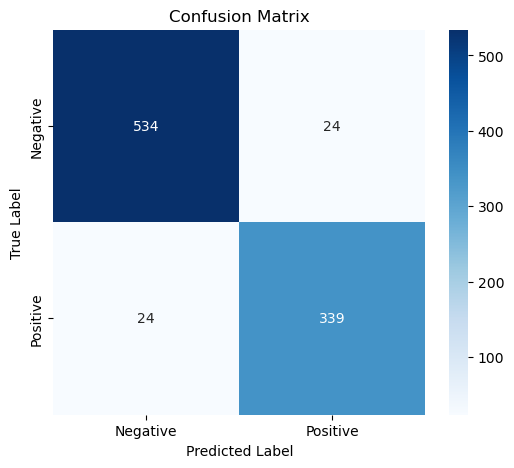

In [65]:
# Compute the confusion matrix using the correct labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Negative", "Positive"], 
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [69]:
from sklearn.metrics import classification_report

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       558
           1       0.93      0.93      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



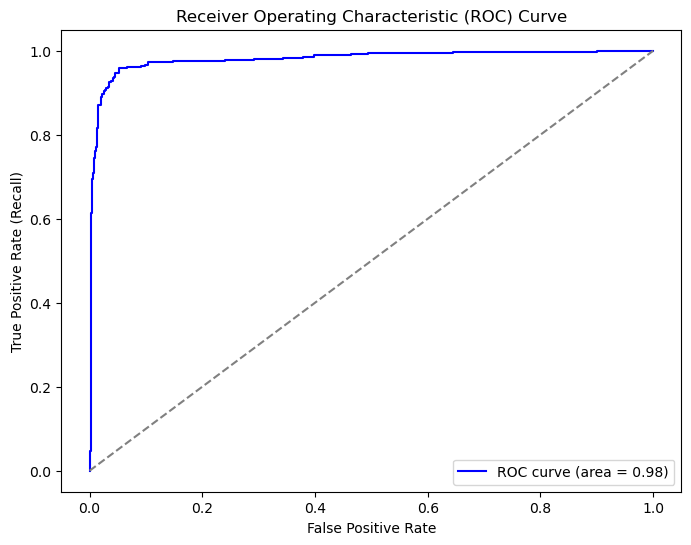

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


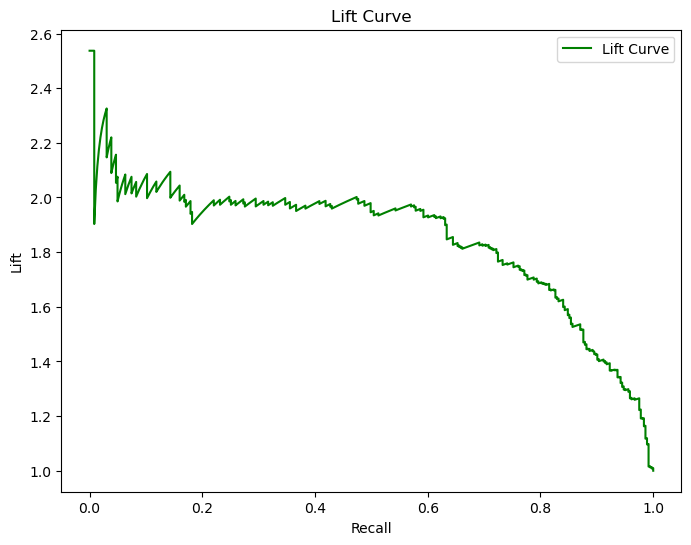

In [81]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate lift (precision divided by the baseline precision)
baseline_precision = sum(y_test) / len(y_test)  # Random classifier precision (percentage of positives)
lift = precision / baseline_precision

# Plot Lift curve
plt.figure(figsize=(8, 6))
plt.plot(recall, lift, color='g', label='Lift Curve')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend(loc='best')
plt.show()
